<a href="https://colab.research.google.com/github/mowyaho/bbca-prediksi-saham/blob/main/BBCA_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi BBCA

# 1. Data

In [ ]:
# import pandas (library untuk bekerja dengan data)
import pandas as pd

# membaca file dataset, mengubah kolom pertama menjadi tanggal dan menjadikan kolom pertama menjadi indeks tabel
df = pd.read_csv("BBCA.JK.csv", parse_dates=[0], index_col=0)

'''
parse_dates=[0] mengubah kolom pertama (tanggal) menjadi format tanggal, karena
kita akan melakukan analisis deret waktu (time series), dan format tanggal akan
membantu dalam pengurutan dan manipulasi data berdasarkan waktu.
'''

'''
index_col=0 menjadikan kolom pertama sebagai indeks tabel. Menggunakan tanggal
sebagai indeks akan memudahkan saat kita melakukan analisis atau plotting
berdasarkan waktu.
'''

'\nindex_col=0 menjadikan kolom pertama sebagai indeks tabel. Menggunakan tanggal\nsebagai indeks akan memudahkan saat kita melakukan analisis atau plotting\nberdasarkan waktu.\n'

In [ ]:
# Menampilkan data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-12,9150.0,9150.0,9100.0,9150.0,8901.427734,38082300
2023-06-13,9175.0,9175.0,9100.0,9150.0,8901.427734,45552600
2023-06-14,9100.0,9125.0,9050.0,9075.0,8828.464844,72223700
2023-06-15,9100.0,9100.0,9050.0,9050.0,8804.144531,59073000
2023-06-16,9100.0,9100.0,8975.0,9050.0,8804.144531,112769400
...,...,...,...,...,...,...
2024-06-05,9500.0,9500.0,9300.0,9450.0,9450.000000,82087300
2024-06-06,9525.0,9525.0,9450.0,9475.0,9475.000000,44991300
2024-06-07,9500.0,9500.0,9325.0,9325.0,9325.000000,51599800


In [ ]:
# Menampilkan 5 baris data terakhir untuk melihat data terbaru
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-05,9500.0,9500.0,9300.0,9450.0,9450.0,82087300
2024-06-06,9525.0,9525.0,9450.0,9475.0,9475.0,44991300
2024-06-07,9500.0,9500.0,9325.0,9325.0,9325.0,51599800
2024-06-10,9500.0,9525.0,9450.0,9525.0,9525.0,45584700
2024-06-11,9550.0,9550.0,9300.0,9300.0,9300.0,68690900


In [ ]:
# Menghitung jumlah baris data
len(df)

'''
Menghitung jumlah baris data membantu kita memahami seberapa besar dataset
yang kita miliki. penting untuk merencanakan analisis kita karena ukuran data
dapat mempengaruhi metode analisis dan waktu komputasi
'''

'\nMenghitung jumlah baris data membantu kita memahami seberapa besar dataset\nyang kita miliki. penting untuk merencanakan analisis kita karena ukuran data\ndapat mempengaruhi metode analisis dan waktu komputasi\n'

'\nMemvisualisasikan data tanpa kolom volume terlebih dahulu membantu kita fokus\npada harga (Open, High, Low, Close, Adj Close) tanpa terganggu oleh fluktuasi\nvolume perdagangan.\n'

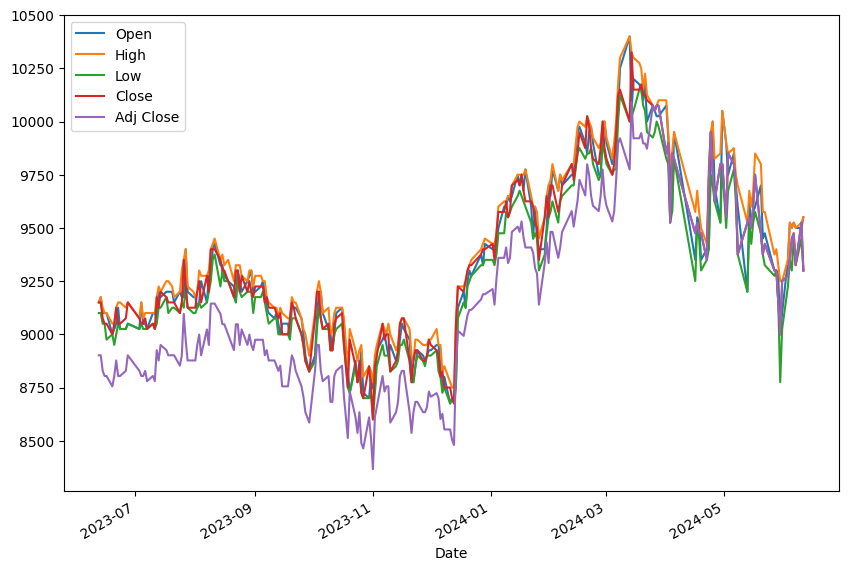

In [ ]:

# import library matplotlib untuk membuat grafik
import matplotlib.pyplot as plt

# visualisasi data: memilih semua kolom kecuali kolom terakhir (volume), membuat grafik dengan ukuran 10x7
df.iloc[:, :-1].plot(figsize=(10, 7))

'''
Memvisualisasikan data tanpa kolom volume terlebih dahulu membantu kita fokus
pada harga (Open, High, Low, Close, Adj Close) tanpa terganggu oleh fluktuasi
volume perdagangan.
'''

'\nSetelah kita memahami tren harga, kita bisa menambahkan volume ke dalam\nvisualisasi, untuk membantu melihat apakah ada korelasi antara volume\nperdagangan dan perubahan harga.\n'

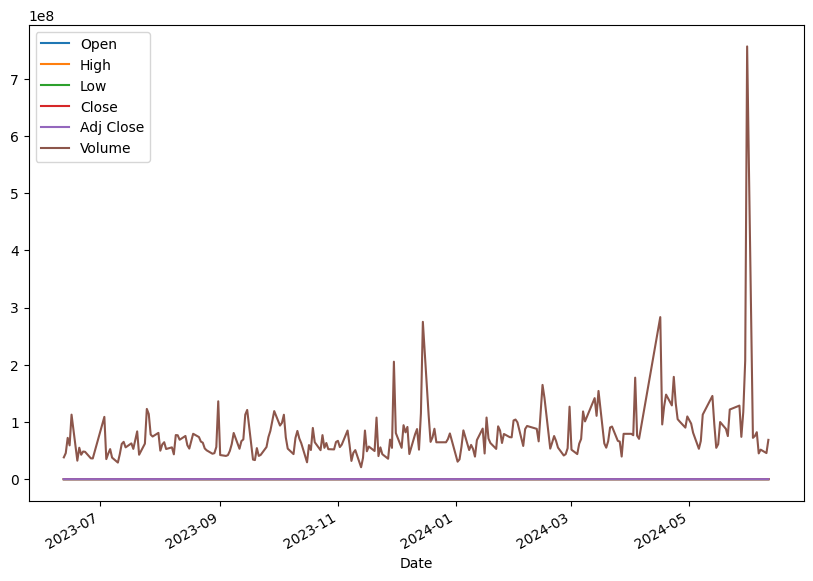

In [ ]:
import matplotlib.pyplot as plt

# visualisasi data dengan volume
df.plot(figsize=(10, 7))

'''
Setelah kita memahami tren harga, kita bisa menambahkan volume ke dalam
visualisasi, untuk membantu melihat apakah ada korelasi antara volume
perdagangan dan perubahan harga.
'''

In [ ]:
# Mengubah data menjadi format array agar lebih mudah diproses oleh komputer
df_value = df.values

'''
Mengonversi data ke format array membuat data lebih mudah diproses oleh
algoritma komputasi atau model machine learning.
'''

'\nMengonversi data ke format array membuat data lebih mudah diproses oleh\nalgoritma komputasi atau model machine learning.\n'

In [ ]:
# Menampilkan data yang telah diubah ke format array
df_value

array([[9.15000000e+03, 9.15000000e+03, 9.10000000e+03, 9.15000000e+03,
        8.90142773e+03, 3.80823000e+07],
       [9.17500000e+03, 9.17500000e+03, 9.10000000e+03, 9.15000000e+03,
        8.90142773e+03, 4.55526000e+07],
       [9.10000000e+03, 9.12500000e+03, 9.05000000e+03, 9.07500000e+03,
        8.82846484e+03, 7.22237000e+07],
       ...,
       [9.50000000e+03, 9.50000000e+03, 9.32500000e+03, 9.32500000e+03,
        9.32500000e+03, 5.15998000e+07],
       [9.50000000e+03, 9.52500000e+03, 9.45000000e+03, 9.52500000e+03,
        9.52500000e+03, 4.55847000e+07],
       [9.55000000e+03, 9.55000000e+03, 9.30000000e+03, 9.30000000e+03,
        9.30000000e+03, 6.86909000e+07]])

# 2. Preprocessing

## Create train and test set

In [ ]:
# split train and test dats

# Mengonversi index dari DataFrame menjadi Array NumPy untuk disimpan dalam variable timesteps
timesteps = df.index.to_numpy()

# Mengonversi Kolom Close dari DataFrame menjadi Array NumPy untuk disimpan dalam variable close
close = df["Close"].to_numpy()

# Mengambil dan menampilkan 10 elemen pertama dari array timesteps dan close.
timesteps[:10], close[:10]

(array(['2023-06-12T00:00:00.000000000', '2023-06-13T00:00:00.000000000',
        '2023-06-14T00:00:00.000000000', '2023-06-15T00:00:00.000000000',
        '2023-06-16T00:00:00.000000000', '2023-06-19T00:00:00.000000000',
        '2023-06-20T00:00:00.000000000', '2023-06-21T00:00:00.000000000',
        '2023-06-22T00:00:00.000000000', '2023-06-23T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([9150., 9150., 9075., 9050., 9050., 9000., 9050., 9125., 9050.,
        9050.]))

In [ ]:
#  Menghitung jumlah baris dalam DataFrame df lalu mengalikkan Jumlah baris dengan 0.8 untuk mendapatkan 80% dari total baris
len(df) * 0.8

188.8

In [ ]:
import tensorflow as tf

# Mengambil 188 array pertama dari variabel timesteps dan menyimpan nya ke variabel X_train
X_train = timesteps[:188]

# Mengambil 188 array pertama dari variabel close dan mengubah nya menjadi tensor dan menyimpan nya ke variable y_train untuk data latih
y_train = tf.constant(close[:188])

# Melihat 10  elemen pertama dari y_train dan X_train
y_train[:10], X_train[:10]

(<tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([9150., 9150., 9075., 9050., 9050., 9000., 9050., 9125., 9050.,
        9050.])>,
 array(['2023-06-12T00:00:00.000000000', '2023-06-13T00:00:00.000000000',
        '2023-06-14T00:00:00.000000000', '2023-06-15T00:00:00.000000000',
        '2023-06-16T00:00:00.000000000', '2023-06-19T00:00:00.000000000',
        '2023-06-20T00:00:00.000000000', '2023-06-21T00:00:00.000000000',
        '2023-06-22T00:00:00.000000000', '2023-06-23T00:00:00.000000000'],
       dtype='datetime64[ns]'))

In [ ]:
# Melihat bentuk shape dari Tensor y_train
y_train.shape

TensorShape([188])

In [ ]:
# Mengambil 188 array pertama dari timesteps dan disimpan dalam variable X_test
X_test = timesteps[188:]

# Mengambil 188 array pertama dari variabel close dan mengubah nya menjadi tensor dan menyimpan nya ke variable y_test
y_test = tf.constant(close[188:])

# Melihat 10  elemen pertama dari y_test dan X_test
X_test[:10], y_test[:10]

(array(['2024-03-20T00:00:00.000000000', '2024-03-21T00:00:00.000000000',
        '2024-03-22T00:00:00.000000000', '2024-03-25T00:00:00.000000000',
        '2024-03-26T00:00:00.000000000', '2024-03-27T00:00:00.000000000',
        '2024-03-28T00:00:00.000000000', '2024-04-01T00:00:00.000000000',
        '2024-04-02T00:00:00.000000000', '2024-04-03T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 <tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([10125., 10125., 10100., 10075., 10050., 10075., 10075.,  9850.,
         9900.,  9525.])>)

In [ ]:
# Mengembalikan jumlah dari elemen array X_train dan y_train
len(X_train), len(y_train)

(188, 188)

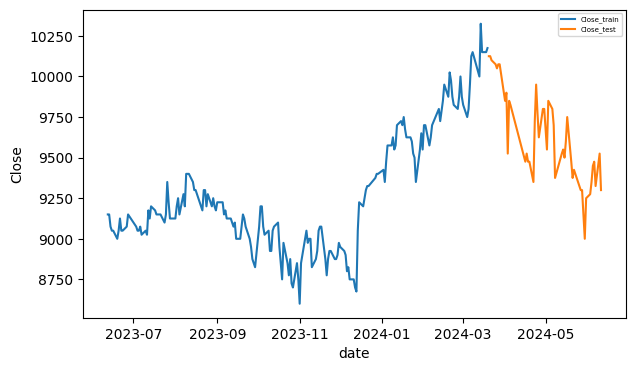

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(X_train, y_train, label="Close_train")
plt.plot(X_test, y_test, label="Close_test")
plt.xlabel("date")
plt.ylabel("Close")
plt.legend(fontsize=5)
plt.show()

## Evaluasi Model

In [ ]:
def MAE(pred, real):
  MAE = pred - real
  MAE = tf.abs(MAE)
  MAE = tf.reduce_sum(MAE)
  MAE = MAE / len(pred)
  return MAE

In [ ]:
def MSE(pred, real):
  mse = tf.pow([pred - real], 2)
  mse = tf.reduce_sum(mse)
  mse = mse / len(pred)
  return mse

# 3. Model

## Membuat Supervised Learning

In [ ]:
HORIZON = 1 # predict 1 day
WINDOW_SIZE = 7 # previous 7 days

In [ ]:
def label_window(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = y_train[-WINDOW_SIZE:], y_test[HORIZON - 1]

In [ ]:
test_window, test_label

(<tf.Tensor: shape=(7,), dtype=float64, numpy=array([10125., 10150., 10000., 10325., 10150., 10150., 10175.])>,
 <tf.Tensor: shape=(), dtype=float64, numpy=10125.0>)

In [ ]:
HORIZON = 1 # predict 1 day
WINDOW_SIZE = 7 # previous 7 days

test_window, test_label = y_train[-WINDOW_SIZE:], y_test[HORIZON - 1]

test_window, test_label

(<tf.Tensor: shape=(7,), dtype=float64, numpy=array([10125., 10150., 10000., 10325., 10150., 10150., 10175.])>,
 <tf.Tensor: shape=(), dtype=float64, numpy=10125.0>)

In [ ]:
import numpy as np
# create windows
def make_windows(x, window=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window+horizon), axis=0)

  window_index = window_step + np.expand_dims(np.arange(len(x)-(window+horizon-1)), axis=0).T

  windowed_array = x[window_index]

  windows, labels = label_window(windowed_array)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(close)
len(full_windows), len(full_labels)

(229, 229)

In [ ]:
for i in range(3):
  print(full_windows[i]) # the window
  print(full_labels[i]) # the horizon

[9150. 9150. 9075. 9050. 9050. 9000. 9050.]
[9125.]
[9150. 9075. 9050. 9050. 9000. 9050. 9125.]
[9050.]
[9075. 9050. 9050. 9000. 9050. 9125. 9050.]
[9050.]


## create a training test split

In [ ]:
def train_test(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = train_test(full_windows, full_labels)

In [ ]:
len(train_labels), len(test_labels)

(183, 46)

## ML MODEL

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(train_windows, train_labels)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(test_windows)

In [ ]:
len(X_test), len(y_test[2:]), len(y_pred)

(48, 46, 46)

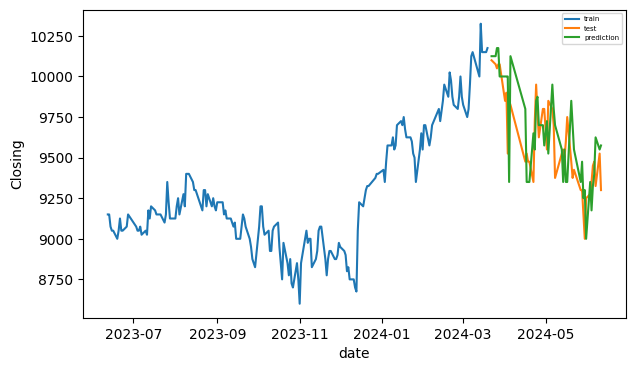

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(timesteps[:188], close[:188], label="train")
plt.plot(X_test[2:], y_test[2:], label="test")
plt.plot(X_test[2:], y_pred, label="prediction")
plt.xlabel("date")
plt.ylabel("Closing")
plt.legend(fontsize=5)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

decisionTree_MSE = MSE(y_pred, test_labels)
decisionTree_MAE = MAE(y_pred, test_labels)

decisionTree_R2 = r2_score(test_labels, y_pred)


decisionTree_MAE, decisionTree_MSE, decisionTree_R2

(<tf.Tensor: shape=(), dtype=float64, numpy=14870.652173913044>,
 <tf.Tensor: shape=(), dtype=float64, numpy=7375298.9130434785>,
 0.3269084744927905)

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(train_windows, train_labels)

LinearRegression()

In [ ]:
y_pred = regression.predict(test_windows)

In [ ]:
len(X_test), len(y_test[2:]), len(y_pred)

(48, 46, 46)

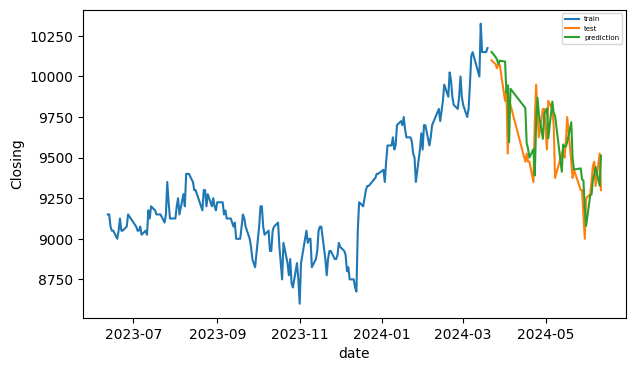

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(timesteps[:188], close[:188], label="train")
plt.plot(X_test[2:], y_test[2:], label="test")
plt.plot(X_test[2:], y_pred, label="prediction")
plt.xlabel("date")
plt.ylabel("Closing")
plt.legend(fontsize=5)
plt.show()

In [ ]:
linearRegression_MSE = MSE(y_pred, test_labels)
linearRegression_MAE = MAE(y_pred, test_labels)
LinearRegression_R2 = r2_score(test_labels, y_pred)


linearRegression_MSE, linearRegression_MAE, LinearRegression_R2


(<tf.Tensor: shape=(), dtype=float64, numpy=29343.05591872996>,
 <tf.Tensor: shape=(), dtype=float64, numpy=135.11007238677655>,
 0.5922464563327731)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_windows, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = regressor.predict(test_windows)

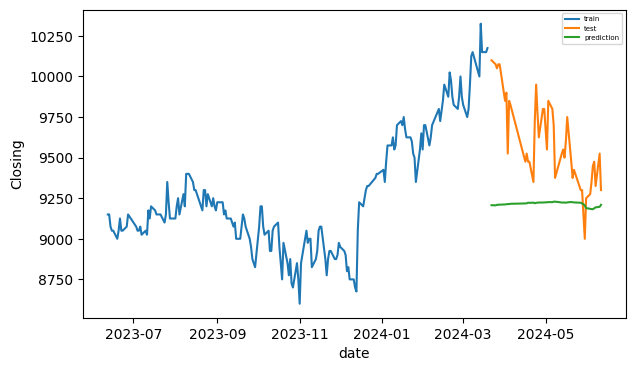

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(timesteps[:188], close[:188], label="train")
plt.plot(X_test[2:], y_test[2:], label="test")
plt.plot(X_test[2:], y_pred, label="prediction")
plt.xlabel("date")
plt.ylabel("Closing")
plt.legend(fontsize=5)
plt.show()

In [ ]:
SVM_MSE = MSE(y_pred, test_labels)
SVM_MAE = MAE(y_pred, test_labels)
SVM_R2 = r2_score(test_labels, y_pred)



SVM_MSE, SVM_MAE, SVM_R2

(<tf.Tensor: shape=(), dtype=float64, numpy=10064608.207457958>,
 <tf.Tensor: shape=(), dtype=float64, numpy=18174.069653457304>,
 -2.0216424163418947)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(train_windows, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred = regressor.predict(test_windows)

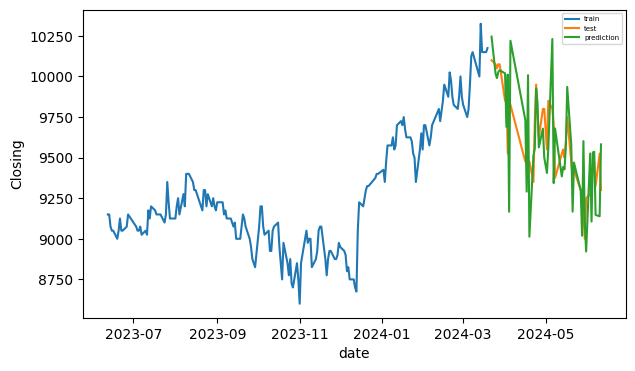

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(timesteps[:188], close[:188], label="train")
plt.plot(X_test[2:], y_test[2:], label="test")
plt.plot(X_test[2:], y_pred, label="prediction")
plt.xlabel("date")
plt.ylabel("Closing")
plt.legend(fontsize=5)
plt.show()

In [ ]:
SVM_linear_MSE = MSE(y_pred, test_labels)
SVM_linear_MAE = MAE(y_pred, test_labels)
SVM_linear_R2 = r2_score(test_labels, y_pred)


SVM_linear_MSE, SVM_linear_MAE, SVM_linear_R2

(<tf.Tensor: shape=(), dtype=float64, numpy=8908820.215817526>,
 <tf.Tensor: shape=(), dtype=float64, numpy=16443.86377855716>,
 0.03807325336952283)

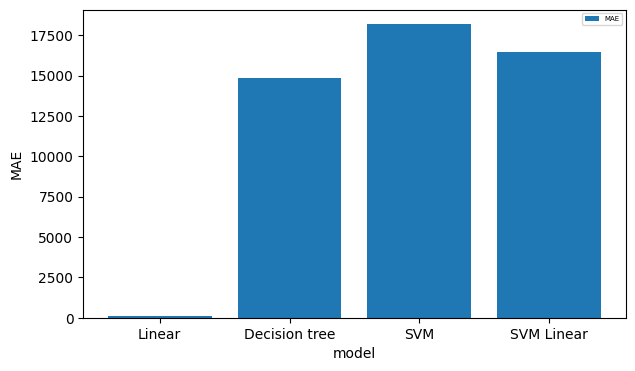

In [ ]:
plt.figure(figsize=(7, 4))
plt.bar(['Linear', 'Decision tree', "SVM", "SVM Linear"], [linearRegression_MAE, decisionTree_MAE, SVM_MAE, SVM_linear_MAE], label="MAE")
plt.xlabel("model")
plt.ylabel("MAE")
plt.legend(fontsize=5)
plt.show()